# Logistic Regression & Data Preprocessing



### Week of November 21st, 2020
### Prepared by: Moe Fadae & Najem Bouazza

**In this session, we will learn the following points :** 

    1 - Data pre-processing: Statiscal significance using P-values
    2 - Plotting : Matplotlib library
    3 - Categorical Variables
    4 - Practical Example on Logistic Regression

## 1 - Multi Linear Regression : P-values

In [1]:
import pandas as pd
df = pd.read_csv("house_price_data.csv")

In [2]:
dataset = df.copy()
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
dataset = dataset[["LotFrontage","LotArea","GarageCars","GarageArea","SalePrice"]]

In [4]:
dataset.isnull().sum()

LotFrontage    259
LotArea          0
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

In [5]:
dataset.fillna(value=dataset["LotFrontage"].mean(), inplace = True)

In [6]:
dataset.isnull().sum()

LotFrontage    0
LotArea        0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [7]:
dataset.head(5)

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,8450,2,548,208500
1,80.0,9600,2,460,181500
2,68.0,11250,2,608,223500
3,60.0,9550,3,642,140000
4,84.0,14260,3,836,250000


In [8]:
X = dataset[['LotFrontage', 'LotArea', 'GarageCars', 'GarageArea']]
y = dataset["SalePrice"]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression

#Create the model :
regressor = LinearRegression()

#Train the model :
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
L = regressor.coef_
print("Price = {:.2f} + {:.2f}*LotFrontage + {:.2f}*LotArea + {:.2f}*GarageCars + {:.2f}*GarageArea ".
      format(regressor.intercept_,L[0], L[1], L[2] ,L[3]))

Price = 22887.31 + 429.69*LotFrontage + 0.93*LotArea + 42758.97*GarageCars + 89.41*GarageArea 


In [12]:
y_pred = regressor.predict(X_test)

In [13]:
from sklearn.metrics import r2_score
#R_squared : 
R_squared = r2_score(y_test, y_pred)
print("R^2 Value in %:            {:.2f} % ".format((R_squared*100)))

R^2 Value in %:            36.32 % 


### Select the features based on P-values : Backward Elimination

In [29]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
dataset.columns

In [ ]:
dataset = df.copy()
X = dataset[['LotFrontage', 'LotArea', 'GarageCars', 'GarageArea','PoolArea', 'YrSold', 'OverallCond','OverallQual' ,'GarageYrBlt']]

In [233]:
#Fill in the missing values for the following columns
X['LotFrontage'] = X.fillna(X['LotFrontage'].mean(), axis = 1)
X['GarageYrBlt'] = X.fillna(X['GarageYrBlt'].mode()[0], axis = 1)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [234]:
X.isnull().sum()

LotFrontage    0
LotArea        0
GarageCars     0
GarageArea     0
PoolArea       0
YrSold         0
OverallCond    0
OverallQual    0
GarageYrBlt    0
dtype: int64

In [235]:
y = dataset["SalePrice"]
X = X.values
y = y.values
X

array([[6.500e+01, 8.450e+03, 2.000e+00, ..., 5.000e+00, 7.000e+00,
        6.500e+01],
       [8.000e+01, 9.600e+03, 2.000e+00, ..., 8.000e+00, 6.000e+00,
        8.000e+01],
       [6.800e+01, 1.125e+04, 2.000e+00, ..., 5.000e+00, 7.000e+00,
        6.800e+01],
       ...,
       [6.600e+01, 9.042e+03, 1.000e+00, ..., 9.000e+00, 7.000e+00,
        6.600e+01],
       [6.800e+01, 9.717e+03, 1.000e+00, ..., 6.000e+00, 5.000e+00,
        6.800e+01],
       [7.500e+01, 9.937e+03, 1.000e+00, ..., 6.000e+00, 5.000e+00,
        7.500e+01]])

In [236]:
# Multiple Linear Regression equation : 

$y = {b}_{0} + {b}_{1}{x}_{1} + {b}_{2}{x}_{2} + {b}_{3}{x}_{3} + ... $

In [237]:
import numpy as np
arr_ones = np.ones((X.shape[0],1))
X_new = np.append( values= X , arr = arr_ones , axis = 1)
X_new

array([[1.000e+00, 6.500e+01, 8.450e+03, ..., 5.000e+00, 7.000e+00,
        6.500e+01],
       [1.000e+00, 8.000e+01, 9.600e+03, ..., 8.000e+00, 6.000e+00,
        8.000e+01],
       [1.000e+00, 6.800e+01, 1.125e+04, ..., 5.000e+00, 7.000e+00,
        6.800e+01],
       ...,
       [1.000e+00, 6.600e+01, 9.042e+03, ..., 9.000e+00, 7.000e+00,
        6.600e+01],
       [1.000e+00, 6.800e+01, 9.717e+03, ..., 6.000e+00, 5.000e+00,
        6.800e+01],
       [1.000e+00, 7.500e+01, 9.937e+03, ..., 6.000e+00, 5.000e+00,
        7.500e+01]])

In [238]:
# columns names and the corresponding indexes :
d = {'ones' : 0, 'LotFrontage': 1 , 'LotArea': 2, 'GarageCars': 3, 'GarageArea': 4,
     'PoolArea':5, 'YrSold':6, 'OverallCond':7,'OverallQual':8 ,'GarageYrBlt':9}

In [239]:
X_select = X_new[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] ]

d = {'ones' : 0, 'LotFrontage': 1 , 'LotArea': 2, 'GarageCars': 3, 'GarageArea': 4,
     'PoolArea':5, 'YrSold':6, 'OverallCond':7,'OverallQual':8 ,'GarageYrBlt':9}

In [240]:
# Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship 
# between one or more independent variables and a dependent variable

OLS_regressor = sm.OLS(y,X_select)

OLS_regressor.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     431.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:54:09   Log-Likelihood:                -17656.
No. Observations:                1460   AIC:                         3.533e+04
Df Residuals:                    1451   BIC:                         3.538e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.647e+05   1.72e+06      0.096      0.924   -3.21e+06    3.54e+06
x1           135.1278     28.717      4.705      0.000      78.796     191.459
x2             1.0597      0.120      8.827      0.000       0.824       1.295
x3          1.411e+04   3390.737      4.163      0.000    7462.793    2.08e+04
x4            42.4327     11.553      3.673      0.000      19.770      65.096
x5            36.5694     28.880      1.266      0.206     -20.081      93.220
x6          -142.0257    857.852     -0.166      0.869   -1824.788    1540.737
x7          1830.1669   1039.694      1.760      0.079    -209.297    3869.631
x8          3.541e+04   1034.924     34.218      0.000    3.34e+04    3.74e+04
x9           135.1278     28.717      4.705      0.000      78.796     191.459
==============================================================================
Omnibus:                      618.619   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11796.420
Skew:                           1.489   Prob(JB):                         0.00
Kurtosis:                      16.603   Cond. No.                     1.76e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [241]:
X_select = X_new[:, [0, 1, 2, 3, 4, 5, 7, 8, 9] ]

d = {'ones' : 0, 'LotFrontage': 1 , 'LotArea': 2, 'GarageCars': 3, 'GarageArea': 4,
     'PoolArea':5, 'OverallCond':7,'OverallQual':8 ,'GarageYrBlt':9}

OLS_regressor = sm.OLS(y,X_select)
OLS_regressor.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     493.0
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:54:09   Log-Likelihood:                -17656.
No. Observations:                1460   AIC:                         3.533e+04
Df Residuals:                    1452   BIC:                         3.537e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.204e+05   8530.004    -14.119      0.000   -1.37e+05   -1.04e+05
x1           134.9881     28.695      4.704      0.000      78.700     191.276
x2             1.0599      0.120      8.833      0.000       0.825       1.295
x3          1.413e+04   3388.247      4.170      0.000    7483.554    2.08e+04
x4            42.4028     11.548      3.672      0.000      19.750      65.055
x5            36.8730     28.812      1.280      0.201     -19.644      93.390
x6          1823.6797   1038.607      1.756      0.079    -213.652    3861.011
x7          3.541e+04   1034.562     34.231      0.000    3.34e+04    3.74e+04
x8           134.9881     28.695      4.704      0.000      78.700     191.276
==============================================================================
Omnibus:                      618.366   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11795.830
Skew:                           1.488   Prob(JB):                         0.00
Kurtosis:                      16.603   Cond. No.                     1.75e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [242]:
X_select = X_new[:, [0, 1, 2, 3, 4, 5, 8, 9] ]

d = {'ones' : 0, 'LotFrontage': 1 , 'LotArea': 2, 'GarageCars': 3, 'GarageArea': 4,
     'PoolArea':5, 'OverallQual':8 ,'GarageYrBlt':9}

OLS_regressor = sm.OLS(y,X_select)
OLS_regressor.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     573.8
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:54:09   Log-Likelihood:                -17657.
No. Observations:                1460   AIC:                         3.533e+04
Df Residuals:                    1453   BIC:                         3.537e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.095e+05   5842.465    -18.745      0.000   -1.21e+05   -9.81e+04
x1           134.1878     28.712      4.674      0.000      77.866     190.509
x2             1.0652      0.120      8.873      0.000       0.830       1.301
x3          1.345e+04   3368.509      3.993      0.000    6843.113    2.01e+04
x4            42.9116     11.553      3.714      0.000      20.250      65.573
x5            36.8325     28.832      1.277      0.202     -19.725      93.390
x6          3.546e+04   1035.008     34.258      0.000    3.34e+04    3.75e+04
x7           134.1878     28.712      4.674      0.000      77.866     190.509
==============================================================================
Omnibus:                      614.482   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11745.399
Skew:                           1.475   Prob(JB):                         0.00
Kurtosis:                      16.579   Cond. No.                     1.75e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [243]:
X_select = X_new[:, [0, 1, 2, 3, 4, 8, 9] ]

d = {'ones' : 0, 'LotFrontage': 1 , 'LotArea': 2, 'GarageCars': 3, 'GarageArea': 4, 'OverallQual':8 ,'GarageYrBlt':9}

OLS_regressor = sm.OLS(y,X_select)
OLS_regressor.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     688.0
Date:                Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:54:10   Log-Likelihood:                -17658.
No. Observations:                1460   AIC:                         3.533e+04
Df Residuals:                    1454   BIC:                         3.536e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.104e+05   5801.179    -19.033      0.000   -1.22e+05    -9.9e+04
x1           139.7900     28.381      4.925      0.000      84.117     195.463
x2             1.0689      0.120      8.905      0.000       0.833       1.304
x3          1.313e+04   3359.692      3.907      0.000    6536.667    1.97e+04
x4            43.7053     11.538      3.788      0.000      21.072      66.339
x5          3.552e+04   1034.122     34.347      0.000    3.35e+04    3.75e+04
x6           139.7900     28.381      4.925      0.000      84.117     195.463
==============================================================================
Omnibus:                      639.877   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12085.236
Skew:                           1.564   Prob(JB):                         0.00
Kurtosis:                      16.743   Cond. No.                     1.74e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [244]:
Optimal_features = X_new[:, [0, 1, 2, 3, 4, 8, 9] ]

d

{'ones': 0,
 'LotFrontage': 1,
 'LotArea': 2,
 'GarageCars': 3,
 'GarageArea': 4,
 'OverallQual': 8,
 'GarageYrBlt': 9}

## 2 - Plotting : Matplotlib library

In [245]:
import matplotlib.pyplot as plt

In [246]:
# allows to see the plots on jupyter notebook, if you are using another editor, you'll use: plt.show() 
%matplotlib inline 

In [247]:
plt.show()  # you don't need to use it on jupyter notebook.

In [34]:
import numpy as np

x = np.arange(30)
y = -2*x**2 + 3

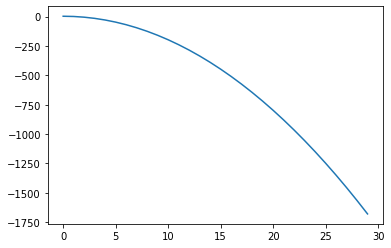

In [38]:
plt.plot(x, y)
#plt.show()   # it's printing the plot instead of just showing it

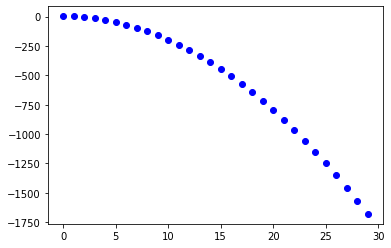

In [39]:
plt.plot(x, y , "bo" )

Text(0.5, 1.0, ' This is the title ')

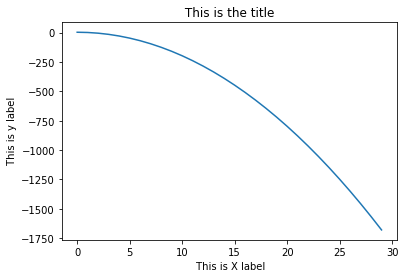

In [118]:
# These are the basics to plot a simple graph
plt.plot(x, y)
plt.xlabel(" This is X label")
plt.ylabel(" This is y label")
plt.title(" This is the title ")

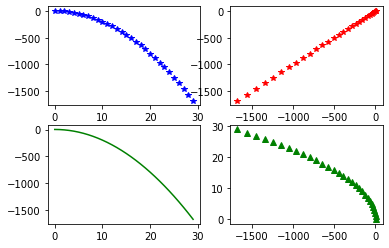

In [49]:
## plt.subplot(nrows, ncols, plot_number) , to create multiple plots on the same canvas

plt.subplot(2,2,1)
plt.plot(x,y , "b*")

plt.subplot(2,2,2)
plt.plot(y,y , "r*")

plt.subplot(2,2,3)
plt.plot(x,y , "g-")

plt.subplot(2,2,4)
plt.plot(y,x , "g^")

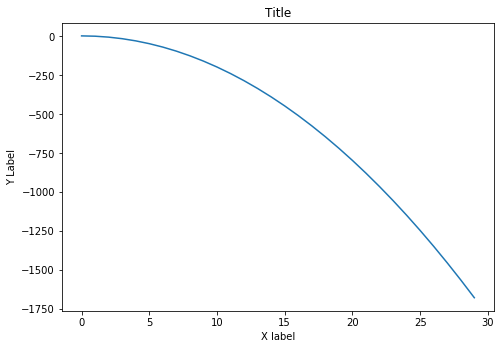

In [63]:
# Object oriented method

# Create empty canvas
fig  =  plt.figure()

# Add set of axes to figure
ax = fig.add_axes([1,1,1,1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
ax.plot(x, y)
ax.set_xlabel("X label")
ax.set_ylabel("Y Label")
ax.set_title("Title")



Text(0.5, 1.0, 'Small window')

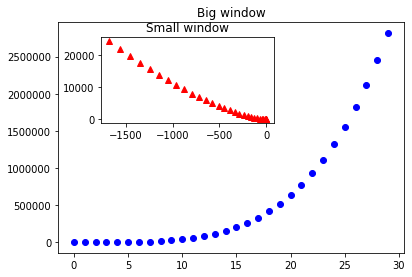

In [74]:

# Create empty canvas
fig  =  plt.figure()  

# adding axes into fig
ax1 = fig.add_axes([0.1,0.1,0.8,0.8]) #Main axes
ax2 = fig.add_axes([0.2,0.55,0.4,0.3]) #inserted axes

ax1.plot(x, y**2, "bo")
ax1.set_title("Big window")

ax2.plot(y,x**3, "r^")
ax2.set_title("Small window")

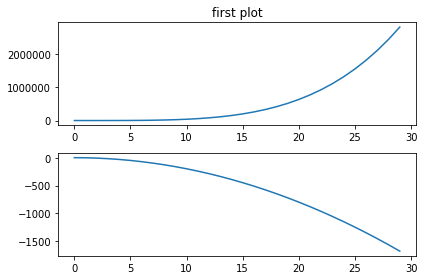

In [82]:
#Creating Subplots

fig, ax = plt.subplots(nrows = 2, ncols = 1)

ax[0].plot(x, y**2)
ax[0].set_title("first plot")
ax[1].plot(x,y)


In [78]:
ax  # is an array of matplotlib axes, we can index it

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000004F94C88>,
      dtype=object)

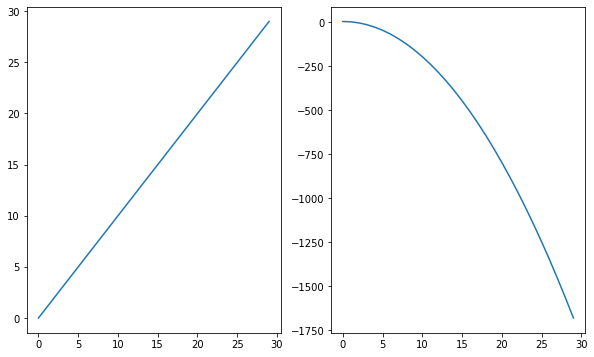

In [120]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,6))

ax[0].plot(x,x)
ax[1].plot(x,y)

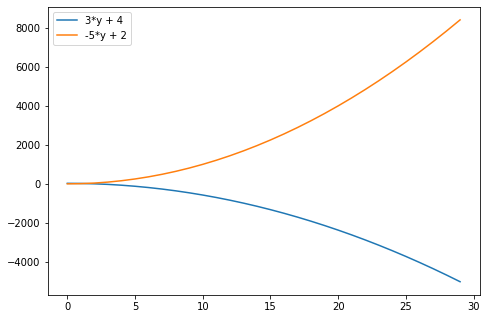

In [121]:
#legend 

#Creating empty figure
fig = plt.figure()

#adding axes
ax = fig.add_axes([0,0,1,1])

#ploting some graphs into axes
ax.plot(x, 3*y + 4 , label = "3*y + 4")
ax.plot(x, -5*y + 2, label = "-5*y + 2")

#Plot legen
plt.legend(loc = 0)  # loc = 0 : to look for the best localtion

#plt.legend(loc = (.3,.5))

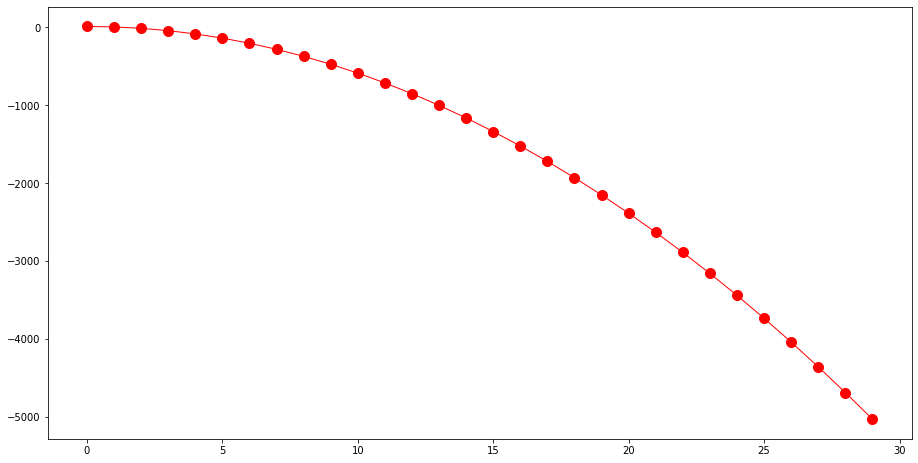

In [117]:
# Create an empty canvas with a specified size
fig = plt.figure(figsize=(12,6))

#adding axes
ax = fig.add_axes([0,0,1,1])

#Ploting and adjusting some parameters
ax.plot(x, 3*y + 4 , color = "red", linewidth = 1, linestyle = "-" , marker = "o", markersize = 10)

In [ ]:
# Some other plots

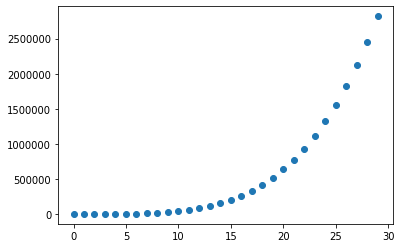

In [124]:
plt.scatter(x,y**2)

(array([ 2.,  2.,  1.,  2.,  2.,  2.,  3.,  3.,  3., 10.]),
 array([-1679. , -1510.8, -1342.6, -1174.4, -1006.2,  -838. ,  -669.8,
         -501.6,  -333.4,  -165.2,     3. ]),
 <a list of 10 Patch objects>)

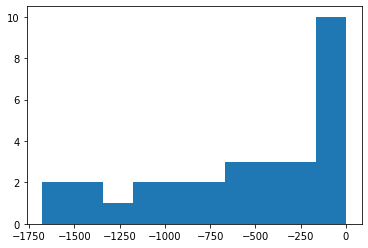

In [126]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1023e788>,
 'caps': [<matplotlib.lines.Line2D at 0x1023ee08>,
 'boxes': [<matplotlib.lines.Line2D at 0x10236fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x10243d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x10243e88>],
 'means': []}

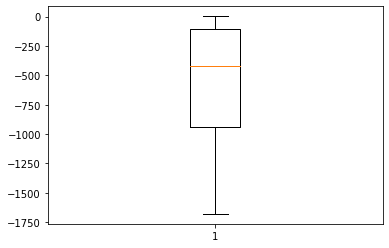

In [131]:
plt.boxplot(y)

### For reference :
https://matplotlib.org/gallery.html

http://www.matplotlib.org

https://github.com/rougier/matplotlib-tutorial


## 3 - Categorical variables

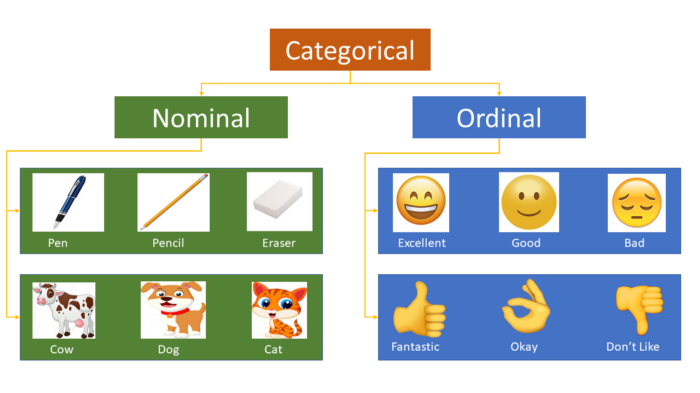

In [26]:
import pandas as pd
df = pd.read_csv("house_price_data.csv")

In [27]:
dataset_2 = df.copy()

In [39]:
dataset_2 = dataset_2[["LotFrontage", "Foundation" ,"LotArea","GarageCars","GarageArea","SalePrice"]]

# you can add these 2 categorical columns to your dataset_2 and try to encode them:
# dataset_2[["CentralAir", , "ExterQual"]]

In [40]:
dataset_2

,LotFrontage,Foundation,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,PConc,8450,2,548,208500
1,80.0,CBlock,9600,2,460,181500
2,68.0,PConc,11250,2,608,223500
3,60.0,BrkTil,9550,3,642,140000
4,84.0,PConc,14260,3,836,250000
...,...,...,...,...,...,...
1455,62.0,PConc,7917,2,460,175000
1456,85.0,CBlock,13175,2,500,210000
1457,66.0,Stone,9042,1,252,266500
1458,68.0,CBlock,9717,1,240,142125


In [30]:
dataset_2["Foundation"].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

In [37]:
#dataset_2["CentralAir"].unique()

In [38]:
#dataset_2["ExterQual"].unique()

In [46]:
X = dataset_2.drop("SalePrice", axis = 1)

In [48]:
dataset_2

,LotFrontage,Foundation,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,PConc,8450,2,548,208500
1,80.0,CBlock,9600,2,460,181500
2,68.0,PConc,11250,2,608,223500
3,60.0,BrkTil,9550,3,642,140000
4,84.0,PConc,14260,3,836,250000
...,...,...,...,...,...,...
1455,62.0,PConc,7917,2,460,175000
1456,85.0,CBlock,13175,2,500,210000
1457,66.0,Stone,9042,1,252,266500
1458,68.0,CBlock,9717,1,240,142125


In [33]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   CentralAir   1460 non-null   object 
 2   Foundation   1460 non-null   object 
 3   ExterQual    1460 non-null   object 
 4   LotArea      1460 non-null   int64  
 5   GarageCars   1460 non-null   int64  
 6   GarageArea   1460 non-null   int64  
 7   SalePrice    1460 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 91.4+ KB


#### OneHot Encoding :

We will be using these 2 classes to encode the categorical variables :

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [59]:
ct = ColumnTransformer(transformers = [("Encoder", OneHotEncoder(), [1])], remainder='passthrough')

In [60]:
X  = ct.fit_transform(X)

In [67]:
import numpy as np
X = np.array(X)
X[0]

array([0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       6.50e+01, 8.45e+03, 2.00e+00, 5.48e+02])

#### Label Encoder : 

Eeach category is assigned a value from 1 through the number of categories for the feature.

In [ ]:
dataset_3 = df.copy()

In [85]:
dataset_3 = dataset_2[["LotFrontage", "CentralAir" ,"LotArea","GarageCars","GarageArea","SalePrice"]]

In [84]:
dataset_3["CentralAir"].unique()

array([1, 0])

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_3["CentralAir"] = le.fit_transform(dataset_2["CentralAir"])

In [78]:
dataset_3

,LotFrontage,CentralAir,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,1,8450,2,548,208500
1,80.0,1,9600,2,460,181500
2,68.0,1,11250,2,608,223500
3,60.0,1,9550,3,642,140000
4,84.0,1,14260,3,836,250000
...,...,...,...,...,...,...
1455,62.0,1,7917,2,460,175000
1456,85.0,1,13175,2,500,210000
1457,66.0,1,9042,1,252,266500
1458,68.0,1,9717,1,240,142125


#### Pandas has get_dummies()

re-importing the data

In [87]:
df = pd.read_csv("house_price_data.csv")
dataset_3 = df.copy()
dataset_3 = dataset_3[["LotFrontage", "CentralAir" ,"LotArea","GarageCars","GarageArea","SalePrice"]]
dataset_3

,LotFrontage,CentralAir,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,Y,8450,2,548,208500
1,80.0,Y,9600,2,460,181500
2,68.0,Y,11250,2,608,223500
3,60.0,Y,9550,3,642,140000
4,84.0,Y,14260,3,836,250000
...,...,...,...,...,...,...
1455,62.0,Y,7917,2,460,175000
1456,85.0,Y,13175,2,500,210000
1457,66.0,Y,9042,1,252,266500
1458,68.0,Y,9717,1,240,142125


In [92]:
dataset_3 = pd.get_dummies(dataset_3, "CentralAir")
dataset_3

,LotFrontage,LotArea,GarageCars,GarageArea,SalePrice,CentralAir_N,CentralAir_Y
0,65.0,8450,2,548,208500,0,1
1,80.0,9600,2,460,181500,0,1
2,68.0,11250,2,608,223500,0,1
3,60.0,9550,3,642,140000,0,1
4,84.0,14260,3,836,250000,0,1
...,...,...,...,...,...,...,...
1455,62.0,7917,2,460,175000,0,1
1456,85.0,13175,2,500,210000,0,1
1457,66.0,9042,1,252,266500,0,1
1458,68.0,9717,1,240,142125,0,1


#### Ordinal Encoding 

The encoding of variables retains the ordinal nature of the variable

In [98]:
dataset_4 = df.copy()
dataset_4 = dataset_4[["LotFrontage", "ExterQual" ,"LotArea","GarageCars","GarageArea","SalePrice"]]
dataset_4

,LotFrontage,ExterQual,LotArea,GarageCars,GarageArea,SalePrice
0,65.0,Gd,8450,2,548,208500
1,80.0,TA,9600,2,460,181500
2,68.0,Gd,11250,2,608,223500
3,60.0,TA,9550,3,642,140000
4,84.0,Gd,14260,3,836,250000
...,...,...,...,...,...,...
1455,62.0,TA,7917,2,460,175000
1456,85.0,TA,13175,2,500,210000
1457,66.0,Ex,9042,1,252,266500
1458,68.0,TA,9717,1,240,142125


In [95]:
dataset_4["ExterQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [97]:
dict_4 = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
dataset_4["Quality"] = dataset_4["ExterQual"].map(dict_4)
dataset_4

,LotFrontage,ExterQual,LotArea,GarageCars,GarageArea,SalePrice,Quality
0,65.0,Gd,8450,2,548,208500,3
1,80.0,TA,9600,2,460,181500,2
2,68.0,Gd,11250,2,608,223500,3
3,60.0,TA,9550,3,642,140000,2
4,84.0,Gd,14260,3,836,250000,3
...,...,...,...,...,...,...,...
1455,62.0,TA,7917,2,460,175000,2
1456,85.0,TA,13175,2,500,210000,2
1457,66.0,Ex,9042,1,252,266500,4
1458,68.0,TA,9717,1,240,142125,2


## 4 - Logistic Regression

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Get the data

In [2]:
df = pd.read_csv('diabetes_data.csv')
dataset = df.copy()

### Check the head of the data

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Explore the data using seaborn library

In [9]:
dataset[dataset['BloodPressure'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


Text(0.5, 0, 'Age')

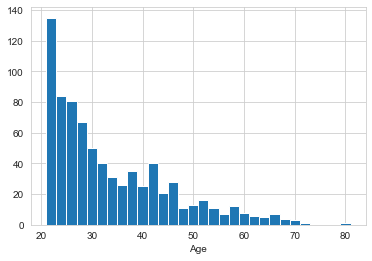

In [6]:
sns.set_style('whitegrid')

dataset['Age'].hist(bins=30)
plt.xlabel('Age')

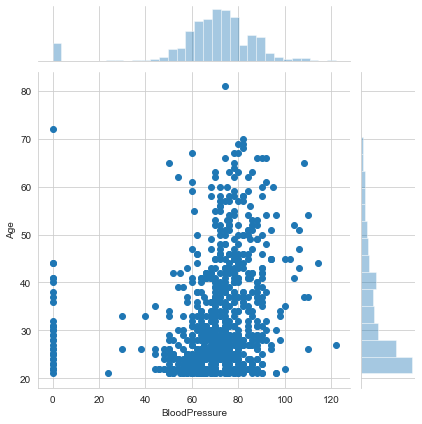

In [7]:
sns.set_style('whitegrid')

sns.jointplot(data = dataset, x = 'BloodPressure', y = 'Age')


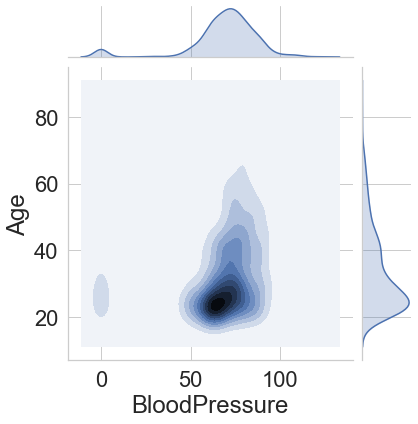

In [151]:
sns.jointplot(data = dataset, x = 'BloodPressure', y = 'Age', kind = 'kde')

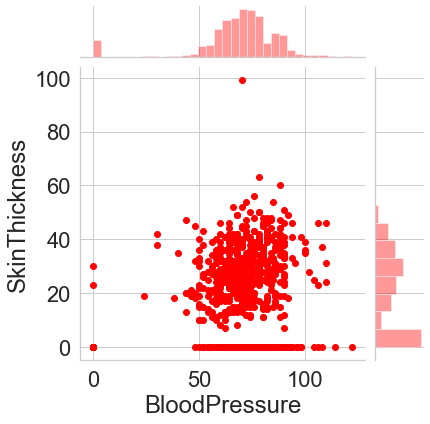

In [152]:
sns.set_style('whitegrid')

sns.jointplot(data = dataset, x = 'BloodPressure', y = 'SkinThickness' , color = 'red')

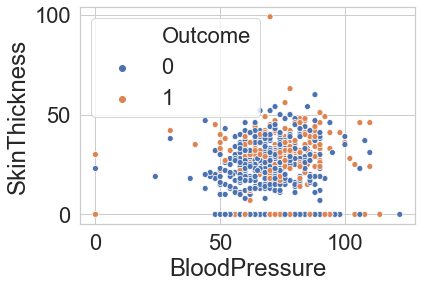

In [153]:
sns.scatterplot(data = dataset, x = 'BloodPressure', y = 'SkinThickness' , hue = 'Outcome')

In [154]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


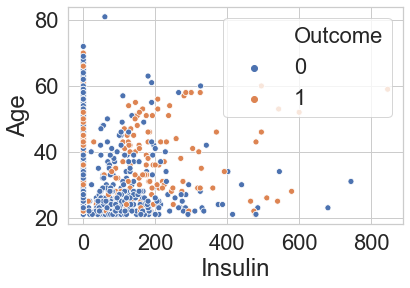

In [155]:
sns.scatterplot(data = dataset, x = 'Insulin', y = 'Age' , hue = 'Outcome')

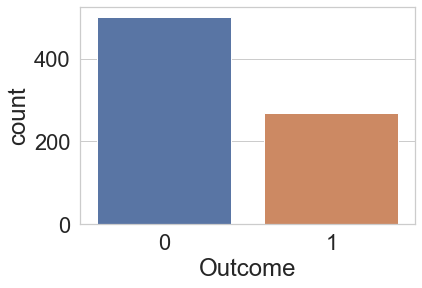

In [156]:
sns.countplot(dataset['Outcome'])

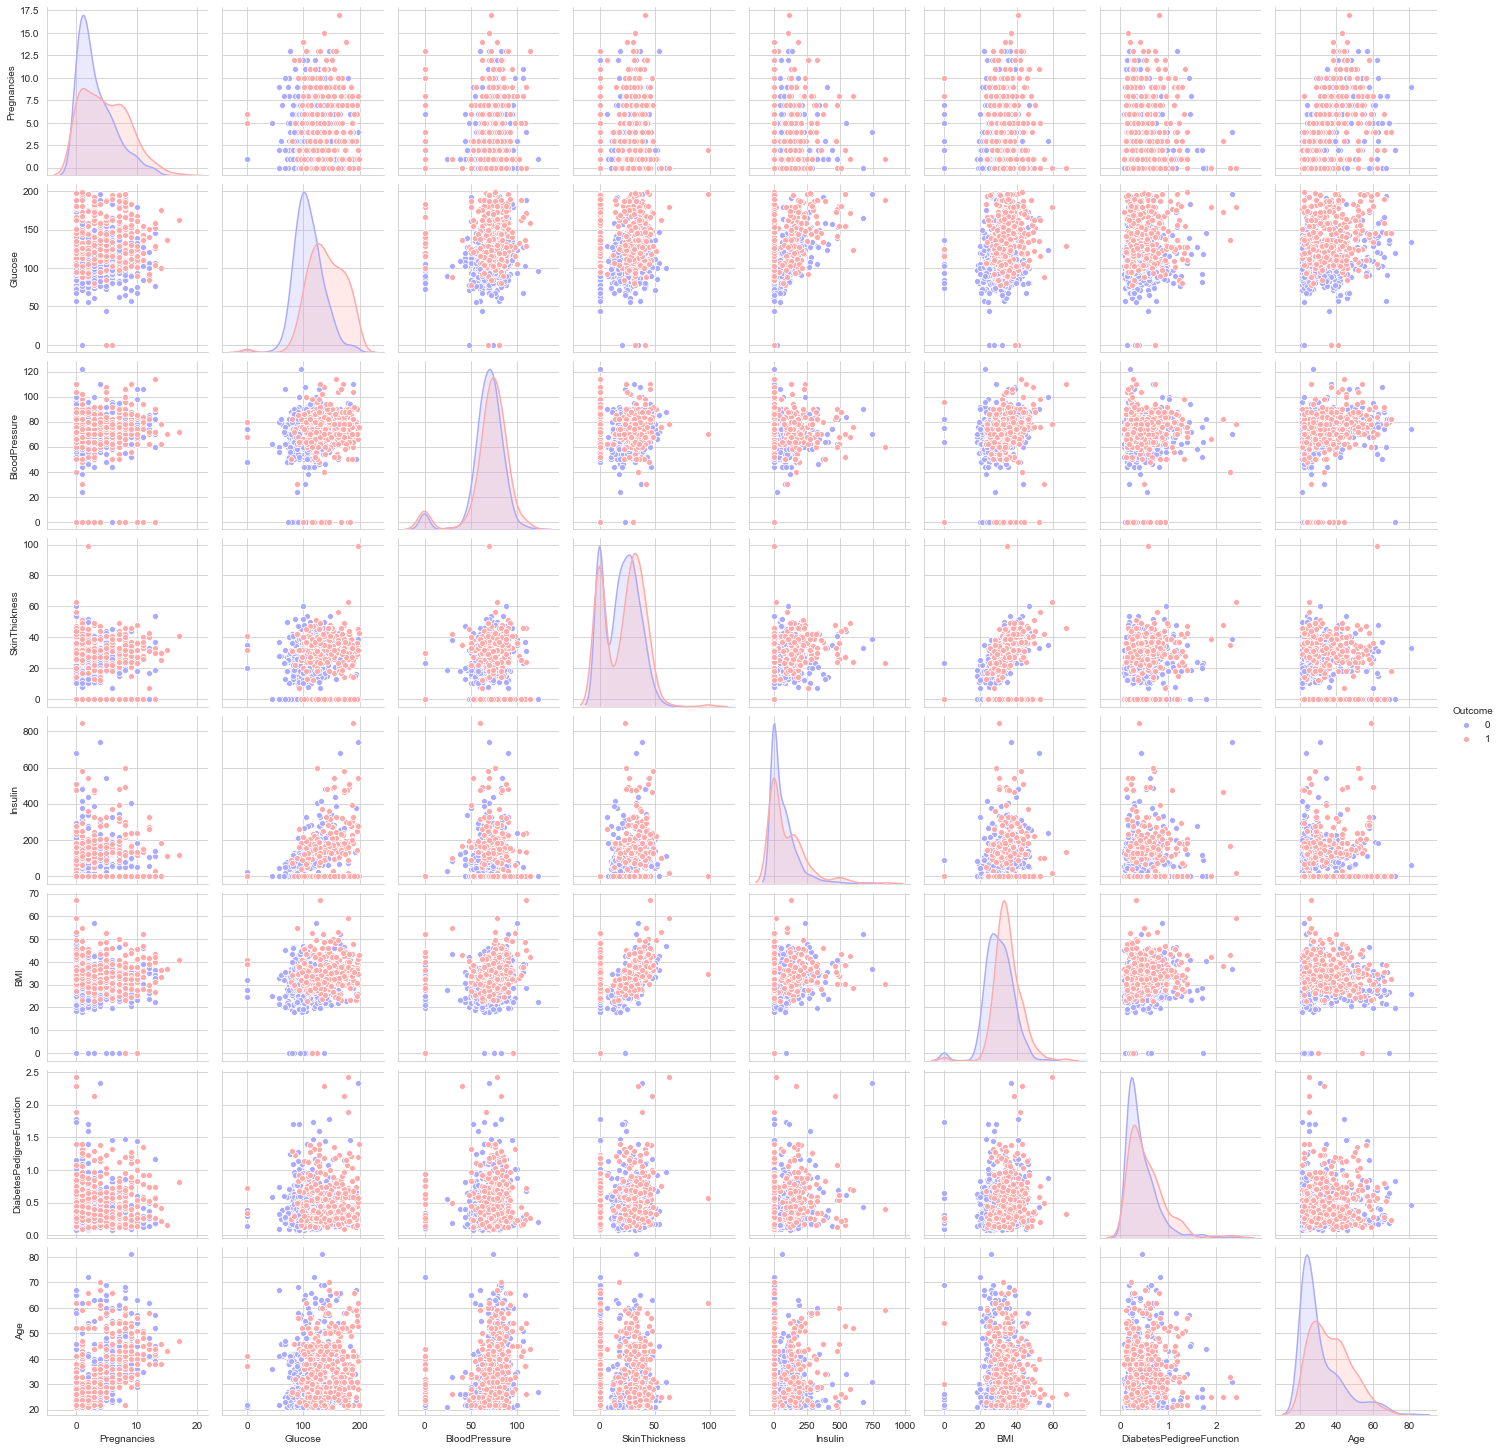

In [14]:
# Creating a paiplot for all variables
sns.pairplot(dataset,hue='Outcome',palette='bwr')

### Create and Train the model

In [158]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [159]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
# Define X and y and convert them to arrays

#X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]

X = dataset.drop('Outcome', axis = 1).values
y = dataset["Outcome"].values

#### Feature Scaling:

In [19]:
'''
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX = sc.fit_transform(X)\n'

#### Split the data into Train and Test sets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 0)

#### Create and train the model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg = LogisticRegression()

In [23]:
log_reg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate the model

In [24]:
#Generate predictions with the model
y_pred = log_reg.predict(X_test)

In [25]:
#Compare y_pred and y_test

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.head(15)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [26]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[98,  9],
       [18, 29]])

Text(9.5, 0.5, 'y_test')

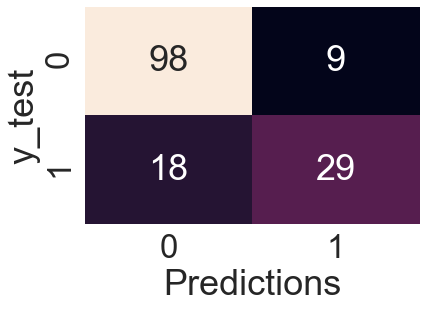

In [28]:
sns.set( font_scale=3)
sns.heatmap(cm , annot = True, cbar= False)
plt.xlabel('Predictions')
plt.ylabel('y_test')

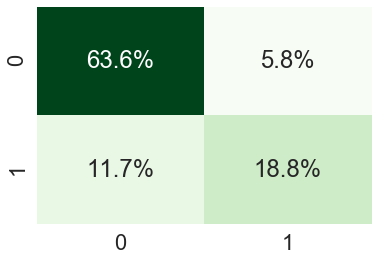

In [187]:
sns.set( font_scale=2)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%', cmap='Greens', cbar = False)

Text(20.5, 0.5, 'y_test')

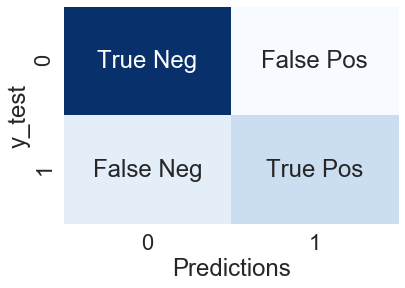

In [188]:
sns.set( font_scale=2)
labels =np.array([['True Neg','False Pos'],['False Neg','True Pos']])
sns.heatmap(cm, annot=labels,fmt='', cmap='Blues', cbar = False)

plt.xlabel('Predictions')
plt.ylabel('y_test')

In [189]:
# Create a classification report for the model
from sklearn.metrics import classification_report

In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

